# Viraj Bhalala
## HW 1 Problem 2
### CS 498: Applied Machine Learning

In [1]:
#PIL(Pillar) is used to easily edit image
from PIL import Image, ImageOps
import sklearn
from sklearn.model_selection import train_test_split
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html
from sklearn.datasets import fetch_mldata
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
from sklearn.naive_bayes import BernoulliNB
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
from sklearn.naive_bayes import GaussianNB
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
import random

In [2]:
random.seed(1)

## MINIST Data contains labeled image data of handwritten numbers

In [3]:
# I am using MNIST dataset provided by sklearn. 
#The dataset length is same compare to the source that is mentioned in course page.
mnist_dataset = fetch_mldata('MNIST original')

## Sample Image as pixel matrix

In [9]:
mnist_dataset['data'][1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
       253, 255,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        96, 205, 251, 253, 205, 111,   4,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Sample data as image

In [19]:
Image.fromarray(mnist_dataset['data'][1].reshape(28,28)).resize((20, 20))

In [4]:
print(len(mnist_dataset['data']))

70000


In [5]:
len((mnist_dataset['data'][1]))

784

## Train and Test Split

In [7]:
# I am using  train and test data split function from sklearn
X_train, X_test, y_train, y_test = train_test_split( mnist_dataset['data'],
                                                    mnist_dataset['target'],
                                                    test_size=10000, 
                                                    random_state=42)

In [8]:
print(len(X_train))
print(len(X_test))

60000
10000


# Part A
### Untouched Images
### BernoulliNB

In [9]:
# I am using Bernoulli Naive Bayes classifier that is provided by sklearn library. 
# Please refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [10]:
predict_y = clf.predict(X_test)

In [11]:
print("Accuracy score of BernoulliNB using untouched images: " ,
      accuracy_score(y_test,predict_y ))

Accuracy score of BernoulliNB using untouched images:  0.8342


### GaussianNB

In [12]:
clf = GaussianNB()
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
print("Accuracy score of GaussianNB using untouched images: " ,
      accuracy_score(y_test,predict_y ))

Accuracy score of GaussianNB using untouched images:  0.5635


### Streched Bounding Box
### Image Prep

In [7]:
data = mnist_dataset['data']
newData = []
outcomes = mnist_dataset['target']
for i in range(0,len(data)):
    #convert array to matrix of 28 by 28 and convert matrix to image. Atlast, resize the image to 20x20
    im = Image.fromarray(data[i].reshape(28,28)).resize((20, 20))
    #get minimum bounding box
    bbox = im.getbbox()
    #crop the image based on bounding box
    newIm = im.crop(bbox)
    #resize image to 20x20
    newIm =newIm.resize((20, 20), Image.ANTIALIAS)
    #add the image pixels back
    newData.append(list(newIm.getdata()))


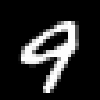

In [21]:
Image.fromarray(data[i].reshape(28,28)).resize((100, 100))

In [14]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split( newData, mnist_dataset['target'], test_size=10000, random_state=42)

### BernoulliNB

In [15]:
# I am using Bernoulli Naive Bayes classifier that is provided by sklearn library. 
# Please refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

clf = BernoulliNB()
clf.fit(X_train_new, y_train_new)
predict_y_new = clf.predict(X_test_new)
print("Accuracy score of BernoulliNB using edit images: " ,accuracy_score(y_test_new,predict_y_new ))

Accuracy score of BernoulliNB using edit images:  0.7416


### GaussianNB

In [16]:
clf = GaussianNB()
clf.fit(X_train_new, y_train_new)
predict_y_new = clf.predict(X_test_new)
print("Accuracy score of GaussianNB using edit images: " ,accuracy_score(y_test_new,predict_y_new ))

Accuracy score of GaussianNB using edit images:  0.8011


# Part B
## Random Forest (Decision Forest)
### Original Images

In [17]:
depthAll = [4,8,16]
treesAll = [10,20,30]
for trees in treesAll:
    for depth in depthAll:
        clf = RandomForestClassifier(max_depth=4, n_estimators=4)
        clf.fit(X_train, y_train)
        predict_y = clf.predict(X_test)
        print("Accuracy score of Random Forest with {} trees and {} max depth using orginal images: {}".format(trees, depth, accuracy_score(y_test,predict_y)))



Accuracy score of Random Forest with 10 trees and 4 max depth using orginal images: 0.6543
Accuracy score of Random Forest with 10 trees and 8 max depth using orginal images: 0.6985
Accuracy score of Random Forest with 10 trees and 16 max depth using orginal images: 0.6777
Accuracy score of Random Forest with 20 trees and 4 max depth using orginal images: 0.6558
Accuracy score of Random Forest with 20 trees and 8 max depth using orginal images: 0.6722
Accuracy score of Random Forest with 20 trees and 16 max depth using orginal images: 0.6635
Accuracy score of Random Forest with 30 trees and 4 max depth using orginal images: 0.6802
Accuracy score of Random Forest with 30 trees and 8 max depth using orginal images: 0.6735
Accuracy score of Random Forest with 30 trees and 16 max depth using orginal images: 0.6726


### Streched Bounding Box with 20x20 pixels



In [18]:
depthAll = [4,8,16]
treesAll = [10,20,30]
for trees in treesAll:
    for depth in depthAll:
        clf = RandomForestClassifier(max_depth=4, n_estimators=4)
        clf.fit(X_train_new, y_train_new)
        predict_y_new = clf.predict(X_test_new)
        print("Accuracy score of Random Forest with {} trees and {} max depth using edit images: {}".format(trees, depth, accuracy_score(y_test_new,predict_y_new)))




Accuracy score of Random Forest with 10 trees and 4 max depth using edit images: 0.6669
Accuracy score of Random Forest with 10 trees and 8 max depth using edit images: 0.6316
Accuracy score of Random Forest with 10 trees and 16 max depth using edit images: 0.684
Accuracy score of Random Forest with 20 trees and 4 max depth using edit images: 0.7148
Accuracy score of Random Forest with 20 trees and 8 max depth using edit images: 0.6504
Accuracy score of Random Forest with 20 trees and 16 max depth using edit images: 0.701
Accuracy score of Random Forest with 30 trees and 4 max depth using edit images: 0.6725
Accuracy score of Random Forest with 30 trees and 8 max depth using edit images: 0.699
Accuracy score of Random Forest with 30 trees and 16 max depth using edit images: 0.6821
